<a href="https://colab.research.google.com/github/tpraveenkgh/CCE_Assignment/blob/main/Copy_of_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Algebra and Calculus Assignment
##### Introduction
This assignment covers three main topics: Linear Algebra, Calculus, and Data Processing and visualisation techniques. You will implement Principal Component Analysis (PCA) for image compression and a basic gradient descent algorithm for linear regression. After that you will work on solving problems posed on tabular data with the help of pandas library.
### Part 1: Linear Algebra - Principal Component Analysis (PCA)
Problem Statement - **Implement PCA to compress a grayscale image**  
Break down the PCA algorithm into the following steps:

1. Load and preprocess the image
2. Compute the covariance matrix
3. Compute eigenvectors and eigenvalues
4. Select top k eigenvectors
5. Project the data onto the new subspace
6. Reconstruct the compressed image
7. Bring it all together in the main function


<div>
  <a href="https://colab.research.google.com/github/emharsha1812/CCE_Assignment/blob/main/Assignments/Linear_Algebra.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
  </a>
</div>

### 1.0 Loading and preprocessing the image  

**Already Done**  Load a grayscale image using an appropriate library  
**Already Done**: Reshape the image into a 2D array where each row represents a pixel

[[-4.88416458 -4.88416458  0.11583542 ... -4.88416458 -4.88416458
  -4.88416458]
 [-4.88416458 -4.88416458 -4.88416458 ...  5.11583542 -4.88416458
  -4.88416458]
 [-4.88416458 -4.88416458 -4.88416458 ... 11.11583542  4.11583542
  -4.88416458]
 ...
 [-4.88416458 -4.88416458 -3.88416458 ...  1.11583542 -4.88416458
  -4.88416458]
 [-4.88416458 -4.88416458 -2.88416458 ...  7.11583542 -4.88416458
  -4.88416458]
 [-4.88416458 -4.88416458  5.11583542 ...  7.11583542 -3.88416458
  -4.88416458]]
8.995463126623417e-17
[[ 1.08047296e-26  1.56296642e-26  8.41976368e-28 ... -6.21587255e-27
  -7.80807145e-28  1.58261872e-26]
 [ 1.56296642e-26  8.22997498e-01  2.40099498e+00 ... -1.59895297e-01
   9.85142275e-02 -7.40618180e-02]
 [ 8.41976368e-28  2.40099498e+00  2.26083735e+01 ... -1.15544033e+00
   1.41203571e+00  7.29880474e-01]
 ...
 [-6.21587255e-27 -1.59895297e-01 -1.15544033e+00 ...  3.48173484e+01
   1.56485444e+01  2.87558266e+00]
 [-7.80807145e-28  9.85142275e-02  1.41203571e+00 ...  1.5648

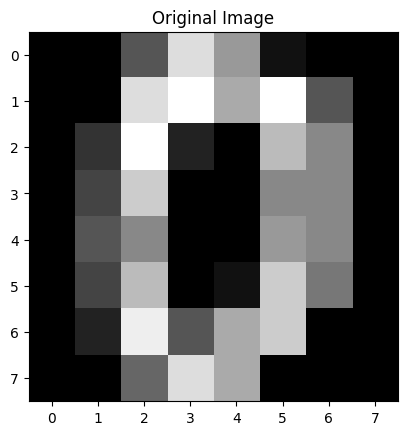

Original image shape: (8, 8)
Total number of pixels: 64


In [13]:
# IMP - We've provided the code to load and preprocess the image data. You don't need to modify this section.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from numpy.linalg import eig

# Load the digits dataset
digits = load_digits()
X = digits.data
X1 = digits.data


#print(X)
#print(X.mean())



# Reshape the first image
image = X[0].reshape(8, 8)


# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

print(f"Original image shape: {image.shape}")
print(f"Total number of pixels: {image.size}")

### 1.1 Compute the covariance matrix

**TODO**: Center the data by subtracting the mean of each feature  
**TODO**: Compute the covariance matrix of the centered data

In [54]:
# 1.1 Compute the covariance matrix
def compute_covariance_matrix(X):
    """
    Compute the covariance matrix for the input data.

    Args:
    X (numpy.ndarray): Input data matrix

    Returns:
    numpy.ndarray: Covariance matrix
    """
    # TODO: Implement the covariance matrix calculation
    # Hint: Remember to center the data by subtracting the mean
    # Avoid division by zero by adding a small epsilon value
    center_function = lambda X: X - X.mean()
    data_centered = center_function(X)
    epsilon = 1e-8
    epsilon_matrix = np.eye(data_centered.shape[1]) * epsilon
    cov_X = np.cov(data_centered.T) + epsilon_matrix
    return cov_X
    #pass



### 1.2 Compute eigenvectors and eigenvalues

**TODO**: Implement a function to compute eigenvectors and eigenvalues of the covariance matrix  
**Hint**: You can use NumPy's linalg.eig function, but try to implement it yourself for learning purposes

In [82]:
# 1.2 Compute eigenvectors and eigenvalues
def compute_eigenvectors_eigenvalues(cov_matrix):
    """
    Compute the eigenvectors and eigenvalues of the covariance matrix.

    Args:
    cov_matrix (numpy.ndarray): Covariance matrix

    Returns:
    tuple: (eigenvalues, eigenvectors)
    """
    epsilon = 1e-10
    eval, evec = np.linalg.eigh(cov_matrix)
    evec = evec.astype(np.float64)
    return eval,evec+epsilon

    #w, v = np.linalg.eig(cov_matrix)
    #print(w)
    # print(v)
    # TODO: Implement eigenvector and eigenvalue calculation
    # Hint: Use numpy.linalg.eigh() for symmetric matrices
    #pass


### 1.3 Select top k eigenvectors

**TODO**: Implement a function to select the top k eigenvectors based on their corresponding eigenvalues  
**TODO**: Create a projection matrix using these eigenvectors

In [83]:
# 1.3 Select top k eigenvectors
def select_top_k_eigenvectors(eigenvalues, eigenvectors, k):
    """
    Select the top k eigenvectors based on eigenvalues.

    Args:
    eigenvalues (numpy.ndarray): Array of eigenvalues
    eigenvectors (numpy.ndarray): Matrix of eigenvectors
    k (int): Number of top eigenvectors to select

    Returns:
    numpy.ndarray: Top k eigenvectors
    """
    # TODO: Implement the selection of top k eigenvectors
    # Hint: Sort eigenvalues and select corresponding eigenvectors

    sorted_indices = np.argsort(eigenvalues) [::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:,sorted_indices]

    # Select the top k eigenvectors

    top_k_eigenvectors = eigenvectors[:, :k]
    return top_k_eigenvectors
    #pass


### 1.4 Project the data onto the new subspace

**TODO**: Project the centered data onto the new subspace defined by the top k eigenvectors  

In [49]:
# 1.4 Project the data onto the new subspace
def project_data(X, eigenvectors):
    """
    Project the data onto the new subspace defined by the eigenvectors.

    Args:
    X (numpy.ndarray): Input data matrix
    eigenvectors (numpy.ndarray): Matrix of selected eigenvectors

    Returns:
    numpy.ndarray: Projected data
    """
    # TODO: Implement the data projection
    # Hint: Center the data and then project it onto the eigenvectors
    data_mean = np.mean(X)
    data_centered = X - data_mean

    projected_data = np.dot(data_centered, eigenvectors)
    return projected_data

    #pass

### 1.5 Reconstruct the compressed image

**TODO**: Implement a function to reconstruct the compressed image from the projected data  

In [87]:

# 1.5 Reconstruct the compressed image
def reconstruct_image(X_projected, top_k_eigenvectors, original_mean):
    """
    Reconstruct the compressed image from the projected data.

    Args:
    X_projected (numpy.ndarray): Projected data
    eigenvectors (numpy.ndarray): Matrix of selected eigenvectors
    original_mean (numpy.ndarray): Mean of the original data

    Returns:
    numpy.ndarray: Reconstructed data
    """
    # TODO: Implement the image reconstruction
    # Hint: Project back to the original space and add the mean
    reconstructed_centered_data = np.dot(X_projected,top_k_eigenvectors.T)
    reconstructed_data = reconstructed_centered_data + original_mean
    return reconstructed_data
    #pass

### 1.6 Complete the main function

In [85]:
# Main PCA function
def perform_pca(X, k):
    """
    Perform PCA on the input data.

    Args:
    X (numpy.ndarray): Input data matrix
    k (int): Number of principal components to keep

    Returns:
    tuple: (compressed_data, reconstructed_data, eigenvectors)
    """

    original_mean = np.mean(X, axis=0)
 #   print(original_mean)
    # TODO: Implement the main PCA function using the helper functions above
    # 1. Compute the covariance matrix
    cov_matrix = compute_covariance_matrix(X)
    # print(f"Covariance matrix123: {cov_matrix}")
    # 2. Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = compute_eigenvectors_eigenvalues(cov_matrix)
    print(f"Eigenvalues: {eigenvalues}")
    print(f"Eigenvectors: {eigenvectors}")
    # 3. Select top k eigenvectors
    top_k_eigenvectors = select_top_k_eigenvectors(eigenvalues, eigenvectors, k)
  #  print(f"Top k eigenvectors: {top_k_eigenvectors}") # Print statement to check output
    # 4. Project the data
    projected_data = project_data(X, eigenvectors=top_k_eigenvectors)
    print(f"Projected data: {projected_data}")
    # 5. Reconstruct the data
    reconstructed_data = reconstruct_image(projected_data, top_k_eigenvectors, original_mean)
    return projected_data, reconstructed_data, eigenvectors
    #pass

Eigenvalues: [1.00000000e-08 1.00000005e-08 1.00000029e-08 4.12233305e-04
 6.61280906e-04 1.27706113e-03 3.62366957e-03 8.47308261e-03
 1.49505736e-02 3.96662397e-02 6.07377681e-02 6.31307948e-02
 9.91528044e-02 2.52350442e-01 4.86065227e-01 6.69850604e-01
 9.31220018e-01 1.15893420e+00 1.29221889e+00 1.40197221e+00
 1.68996440e+00 1.81716570e+00 1.90724230e+00 2.28298745e+00
 2.54170564e+00 2.67210897e+00 2.73780003e+00 3.08457410e+00
 3.53165307e+00 3.70647246e+00 3.94340335e+00 4.04743884e+00
 4.24687800e+00 4.49129657e+00 5.15586691e+00 5.88499124e+00
 6.19295509e+00 6.91973882e+00 7.16577962e+00 8.36561191e+00
 8.69036873e+00 9.22640261e+00 9.58259780e+00 1.06935663e+01
 1.08868593e+01 1.22344732e+01 1.50044602e+01 1.58513899e+01
 1.69468639e+01 1.76367222e+01 2.13243566e+01 2.19014881e+01
 2.73211698e+01 2.85190412e+01 3.70117984e+01 4.03109953e+01
 4.40151067e+01 5.18845391e+01 5.91085249e+01 6.95131656e+01
 1.01100375e+02 1.41788439e+02 1.63717747e+02 1.79006930e+02]
Eigenvecto

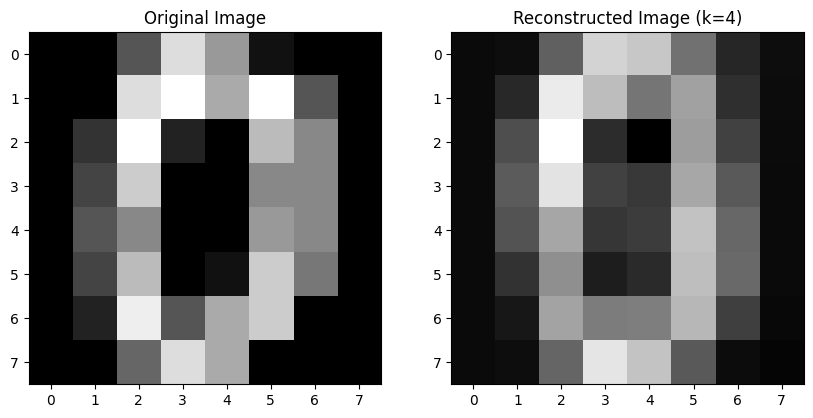

"\ncov_matrix = compute_covariance_matrix(X)\neigenvalues, eigenvectors  = compute_eigenvectors_eigenvalues(cov_matrix)\nevr = explained_variance_ratio(eigenvalues)\ncumulative_evr = np.cumsum(evr)\n\nplt.plot(range(1, len(cumulative_evr) + 1), cumulative_evr)\nplt.xlabel('Number of Components')\nplt.ylabel('Cumulative Explained Variance Ratio')\nplt.title('Explained Variance Ratio vs. Number of Components')\nplt.show()\n"

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from numpy.linalg import eig

# Test the implementation
k = 4

# Number of principal components to keep
digits = load_digits()
X = digits.data

compressed_data, reconstructed_data, eigenvectors = perform_pca(X, k)

# Visualize the result

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X[0].reshape(8, 8), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_data[0].reshape(8, 8), cmap='gray')
plt.title(f'Reconstructed Image (k={k})')
plt.show()
## Bonus: Determine optimal number of principal components

def explained_variance_ratio(eigenvalues):
    return eigenvalues / np.sum(eigenvalues)

# Plot the cumulative explained variance ratio vs. number of components
"""
cov_matrix = compute_covariance_matrix(X)
eigenvalues, eigenvectors  = compute_eigenvectors_eigenvalues(cov_matrix)
evr = explained_variance_ratio(eigenvalues)
cumulative_evr = np.cumsum(evr)

plt.plot(range(1, len(cumulative_evr) + 1), cumulative_evr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()
"""